<a href="https://colab.research.google.com/github/patel-star/Data-Scienceeee/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np

In [65]:
# loading hotel booking data:
df = pd.read_csv('hotel-booking-data.txt',delimiter='\t')
df.head()

,Date,Company,Person Name,Room number
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0
3,Hotels,NaN,NaN,NaN
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0


In [66]:
df.describe()

,Room number
count,153.000000
mean,3079.326797
std,1718.791186
min,1001.000000
25%,2001.000000
50%,3008.000000
75%,4010.000000
max,7002.000000


In [67]:
df['Company'].value_counts()

,count
Company,
Leexo,3
Quinu,3
Fivechat,3
Twitterlist,2
Jayo,2
...,...
Twitterwire,1
Skiba,1
Tagpad,1


In [68]:
df.dropna() #remove NA

,Date,Company,Person Name,Room number
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0
5,1-Jan-2022,Eadel,Broderic Handscombe,3015.0
...,...,...,...,...
186,1-Jan-2022,Tagpad,Stephani Lafee,1015.0
187,1-Jan-2022,Meevee,Victoria Lavery,7002.0
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0


In [69]:
df['2xRoom'] = df['Room number'] * 2
df

,Date,Company,Person Name,Room number,2xRoom
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0,8016.0
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0,4004.0
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0,8024.0
3,Hotels,NaN,NaN,NaN,NaN
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0,2012.0
...,...,...,...,...,...
190,Cleartrip,NaN,NaN,NaN,NaN
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0,8016.0
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0,10004.0
193,1-Jan-2022,Twitterworks,Valentia Ledson,1010.0,2020.0


In [70]:
df2=df.dropna()
df2.head()

,Date,Company,Person Name,Room number,2xRoom
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0,8016.0
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0,4004.0
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0,8024.0
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0,2012.0
5,1-Jan-2022,Eadel,Broderic Handscombe,3015.0,6030.0


In [71]:
df['Room number'].isna()

,Room number
0,False
1,False
2,False
3,True
4,False
...,...
190,True
191,False
192,False
193,False


In [72]:
mask = df['Room number'].isna()
df['Text Value'] = np.where(mask, df['Date'],np.nan)
df

,Date,Company,Person Name,Room number,2xRoom,Text Value
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0,8016.0,NaN
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0,4004.0,NaN
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0,8024.0,NaN
3,Hotels,NaN,NaN,NaN,NaN,Hotels
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0,2012.0,NaN
...,...,...,...,...,...,...
190,Cleartrip,NaN,NaN,NaN,NaN,Cleartrip
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0,8016.0,NaN
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0,10004.0,NaN
193,1-Jan-2022,Twitterworks,Valentia Ledson,1010.0,2020.0,NaN


In [73]:
df['Text Value'].fillna(method='bfill')

<ipython-input-73-c3e5c4c66501>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Text Value'].fillna(method='bfill')


,Text Value
0,Hotels
1,Hotels
2,Hotels
3,Hotels
4,Booking
...,...
190,Cleartrip
191,Hotels
192,Hotels
193,Hotels


In [74]:
# df['Text Value'].fillna(method='bfill',inplace=True)  depricated

df['Text Value'] = df['Text Value'].replace({np.nan: None})
df['Text Value'].ffill(inplace=True)


<ipython-input-74-f457387f8321>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Text Value'].ffill(inplace=True)


In [75]:
df

,Date,Company,Person Name,Room number,2xRoom,Text Value
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0,8016.0,None
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0,4004.0,None
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0,8024.0,None
3,Hotels,NaN,NaN,NaN,NaN,Hotels
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0,2012.0,Hotels
...,...,...,...,...,...,...
190,Cleartrip,NaN,NaN,NaN,NaN,Cleartrip
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0,8016.0,Cleartrip
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0,10004.0,Cleartrip
193,1-Jan-2022,Twitterworks,Valentia Ledson,1010.0,2020.0,Cleartrip


In [76]:
df.dropna(inplace=True)
df

,Date,Company,Person Name,Room number,2xRoom,Text Value
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0,2012.0,Hotels
5,1-Jan-2022,Eadel,Broderic Handscombe,3015.0,6030.0,Hotels
6,1-Jan-2022,Oozz,Deina Harwin,2005.0,4010.0,Hotels
7,1-Jan-2022,Innotype,Benyamin Crocetti,2001.0,4002.0,Hotels
10,1-Jan-2022,Jayo,Tate Manntschke,3014.0,6028.0,Hotels
...,...,...,...,...,...,...
186,1-Jan-2022,Tagpad,Stephani Lafee,1015.0,2030.0,Hotels
187,1-Jan-2022,Meevee,Victoria Lavery,7002.0,14004.0,Hotels
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0,8016.0,Cleartrip
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0,10004.0,Cleartrip


In [77]:
df.value_counts('Text Value')

,count
Text Value,
Hotels,34
Expedia,33
Cleartrip,26
Booking,24
Travel Agent 007,14


<Axes: xlabel='Text Value'>

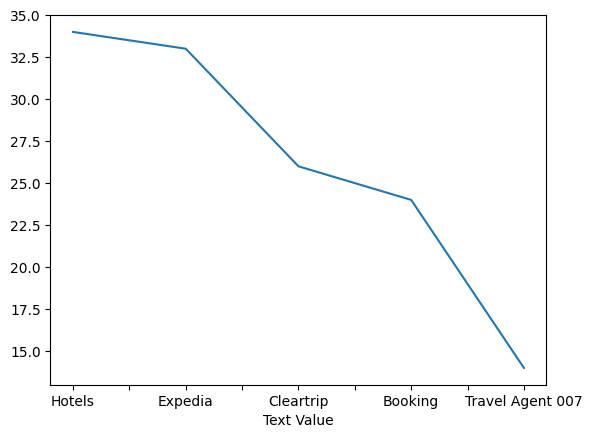

In [78]:
df3 =df.value_counts('Text Value')
df3.plot()

# **freeCodeCamp -- Pandas**

In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,9,8]],columns=['a','b','c'], index=['x','y','z'])
df

,a,b,c
x,1,2,3
y,4,5,6
z,7,9,8


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, x to z
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int64
 1   b       3 non-null      int64
 2   c       3 non-null      int64
dtypes: int64(3)
memory usage: 204.0+ bytes


In [82]:
df.describe()

,a,b,c
count,3.0,3.000000,3.000000
mean,4.0,5.333333,5.666667
std,3.0,3.511885,2.516611
min,1.0,2.000000,3.000000
25%,2.5,3.500000,4.500000
50%,4.0,5.000000,6.000000
75%,5.5,7.000000,7.000000
max,7.0,9.000000,8.000000


In [96]:
coffee=pd.read_csv('coffee.csv')
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [97]:
# different data sets
result = pd.read_parquet('results.parquet')
result

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None
...,...,...,...,...,...,...,...,...,...,...,...
308403,2022.0,Winter,Luge,"Singles, Men (Olympic)",Marián Skupek,148983,SVK,None,26.0,False,None
308404,2022.0,Winter,Alpine Skiing (Skiing),"Slalom, Women (Olympic)",Elsa Fermbäck,148984,SWE,None,28.0,False,None
308405,2022.0,Winter,Alpine Skiing (Skiing),"Team, Mixed (Olympic)",Hilma Lövblom,148985,SWE,Sweden,13.0,False,None
308406,2022.0,Winter,Alpine Skiing (Skiing),"Giant Slalom, Women (Olympic)",Hilma Lövblom,148985,SWE,None,NaN,False,None


In [98]:
# olympics_data = pd.read_excel('olympics-data.xlsx')
olympics_data = pd.read_excel('olympics-data.xlsx', sheet_name="results")

In [99]:
olympics_data.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


In [100]:
coffee.sample(10, random_state=1)

,Day,Coffee Type,Units Sold
3,Tuesday,Latte,20
7,Thursday,Latte,30
6,Thursday,Espresso,40
2,Tuesday,Espresso,30
10,Saturday,Espresso,45
4,Wednesday,Espresso,35
1,Monday,Latte,15
12,Sunday,Espresso,45
0,Monday,Espresso,25
13,Sunday,Latte,35


In [101]:
# data_name.loc(row,columnsName)
coffee.loc[[0,1,5]]

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
5,Wednesday,Latte,25


In [102]:
# coffee.loc[5:]
# coffee.loc[5:10]
coffee.loc[2:6, ['Day','Coffee Type']]

,Day,Coffee Type
2,Tuesday,Espresso
3,Tuesday,Latte
4,Wednesday,Espresso
5,Wednesday,Latte
6,Thursday,Espresso


In [103]:
# same as loc but with index
coffee.iloc[2:7, 0:2]

,Day,Coffee Type
2,Tuesday,Espresso
3,Tuesday,Latte
4,Wednesday,Espresso
5,Wednesday,Latte
6,Thursday,Espresso


In [104]:
# changing the initial index with name of days of week:
coffee.index=coffee['Day']
coffee

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15
Tuesday,Tuesday,Espresso,30
Tuesday,Tuesday,Latte,20
Wednesday,Wednesday,Espresso,35
Wednesday,Wednesday,Latte,25
Thursday,Thursday,Espresso,40
Thursday,Thursday,Latte,30
Friday,Friday,Espresso,45


In [105]:
# We can fetch data using day as index in loc:
coffee.loc["Monday":"Wednesday", ['Coffee Type']]
coffee

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15
Tuesday,Tuesday,Espresso,30
Tuesday,Tuesday,Latte,20
Wednesday,Wednesday,Espresso,35
Wednesday,Wednesday,Latte,25
Thursday,Thursday,Espresso,40
Thursday,Thursday,Latte,30
Friday,Friday,Espresso,45


In [110]:
# change the some of data :
# coffee.loc[1,"Units Sold"] = 444 //not  1 but the name of week, we have changed it
coffee.loc["Monday","Units Sold"] = 444
coffee
coffee.loc["Monday":"Wednesday", ['Units Sold']]=5
coffee

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,5.0
Monday,Monday,Latte,5.0
Tuesday,Tuesday,Espresso,5.0
Tuesday,Tuesday,Latte,5.0
Wednesday,Wednesday,Espresso,5.0
Wednesday,Wednesday,Latte,5.0
Thursday,Thursday,Espresso,40.0
Thursday,Thursday,Latte,30.0
Friday,Friday,Espresso,45.0


In [111]:
# sorting the datas
coffee.sort_values(by='Units Sold')

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,5.0
Monday,Monday,Latte,5.0
Tuesday,Tuesday,Espresso,5.0
Tuesday,Tuesday,Latte,5.0
Wednesday,Wednesday,Espresso,5.0
Wednesday,Wednesday,Latte,5.0
Thursday,Thursday,Latte,30.0
Friday,Friday,Latte,35.0
Sunday,Sunday,Latte,35.0


In [112]:
coffee.sort_values(by='Units Sold', ascending=False)

,Day,Coffee Type,Units Sold
Day,,,
1,NaN,NaN,444.0
Friday,Friday,Espresso,45.0
Sunday,Sunday,Espresso,45.0
Saturday,Saturday,Espresso,45.0
Thursday,Thursday,Espresso,40.0
Friday,Friday,Latte,35.0
Saturday,Saturday,Latte,35.0
Sunday,Sunday,Latte,35.0
Thursday,Thursday,Latte,30.0


In [115]:
coffee.sort_values(['Units Sold','Coffee Type'])

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,5.0
Tuesday,Tuesday,Espresso,5.0
Wednesday,Wednesday,Espresso,5.0
Monday,Monday,Latte,5.0
Tuesday,Tuesday,Latte,5.0
Wednesday,Wednesday,Latte,5.0
Thursday,Thursday,Latte,30.0
Friday,Friday,Latte,35.0
Saturday,Saturday,Latte,35.0


In [116]:
coffee.sort_values(['Units Sold','Coffee Type'], ascending=[False,True]) #or ascending=[0,1]

,Day,Coffee Type,Units Sold
Day,,,
1,NaN,NaN,444.0
Friday,Friday,Espresso,45.0
Saturday,Saturday,Espresso,45.0
Sunday,Sunday,Espresso,45.0
Thursday,Thursday,Espresso,40.0
Friday,Friday,Latte,35.0
Saturday,Saturday,Latte,35.0
Sunday,Sunday,Latte,35.0
Thursday,Thursday,Latte,30.0


In [118]:
# some data are needed to be iterated with summarise unique data
for index,row in coffee.iterrows():
  print(index)
  print(row) #or just print(row['Unit Sold])
  print("\n\n")

Monday
Day              Monday
Coffee Type    Espresso
Units Sold          5.0
Name: Monday, dtype: object



Monday
Day            Monday
Coffee Type     Latte
Units Sold        5.0
Name: Monday, dtype: object



Tuesday
Day             Tuesday
Coffee Type    Espresso
Units Sold          5.0
Name: Tuesday, dtype: object



Tuesday
Day            Tuesday
Coffee Type      Latte
Units Sold         5.0
Name: Tuesday, dtype: object



Wednesday
Day            Wednesday
Coffee Type     Espresso
Units Sold           5.0
Name: Wednesday, dtype: object



Wednesday
Day            Wednesday
Coffee Type        Latte
Units Sold           5.0
Name: Wednesday, dtype: object



Thursday
Day            Thursday
Coffee Type    Espresso
Units Sold         40.0
Name: Thursday, dtype: object



Thursday
Day            Thursday
Coffee Type       Latte
Units Sold         30.0
Name: Thursday, dtype: object



Friday
Day              Friday
Coffee Type    Espresso
Units Sold         45.0
Name: Friday, dtype:

# ***Filtering Data***

In [121]:
bios = pd.read_excel('olympics-data.xlsx', sheet_name="results")
bios

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
308403,2022.0,Winter,Luge,"Singles, Men (Olympic)",Marián Skupek,148983,SVK,NaN,26.0,False,NaN
308404,2022.0,Winter,Alpine Skiing (Skiing),"Slalom, Women (Olympic)",Elsa Fermbäck,148984,SWE,NaN,28.0,False,NaN
308405,2022.0,Winter,Alpine Skiing (Skiing),"Team, Mixed (Olympic)",Hilma Lövblom,148985,SWE,Sweden,13.0,False,NaN
308406,2022.0,Winter,Alpine Skiing (Skiing),"Giant Slalom, Women (Olympic)",Hilma Lövblom,148985,SWE,NaN,NaN,False,NaN


In [122]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [128]:
bios.loc[bios['place'] <20, ['team','place']]

,team,place
0,NaN,17.0
3,Jeanne Vaussard,8.0
4,Jacques Brugnon,4.0
5,NaN,17.0
6,Guillaume Raoux,17.0
...,...,...
308399,Slovakia,3.0
308400,Slovakia,3.0
308401,Slovakia,3.0
308402,Slovakia,3.0


In [132]:
bios[bios['as'].str.contains("Elsa|Hilma")]

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
2009,1992.0,Summer,Badminton,"Singles, Women (Olympic)",Elsa Nielsen,796,ISL,NaN,33.0,True,NaN
2010,1996.0,Summer,Badminton,"Singles, Women (Olympic)",Elsa Nielsen,796,ISL,NaN,33.0,True,NaN
5381,1908.0,Summer,Tennis,"Singles, Covered Courts, Women (Olympic)",Elsa Wallenberg,2605,SWE,NaN,4.0,False,NaN
7968,1968.0,Summer,Boxing,"Flyweight, Men (Olympic)",Boujemaa Hilmann,4497,MAR,NaN,17.0,True,NaN
36201,1948.0,Summer,Fencing,"Foil, Individual, Women (Olympic)",Elsa Irigoyen,20489,ARG,NaN,5.0,False,NaN
36202,1952.0,Summer,Fencing,"Foil, Individual, Women (Olympic)",Elsa Irigoyen,20489,ARG,NaN,6.0,False,NaN
37329,1924.0,Summer,Fencing,"Foil, Individual, Women (Olympic)",Elsa Hellquist,20946,SWE,NaN,4.0,False,NaN
74109,1984.0,Summer,Handball,"Handball, Men (Olympic)",Atli Hilmarsson,32263,ISL,Iceland,6.0,False,NaN
74110,1988.0,Summer,Handball,"Handball, Men (Olympic)",Atli Hilmarsson,32263,ISL,Iceland,8.0,False,NaN
96161,1988.0,Summer,Swimming (Aquatics),"50 metres Freestyle, Women (Olympic)",Elsa Freire,44905,ANG,NaN,47.0,False,NaN


# ***Adding / Removing columns:***

In [134]:
# Add a new column
coffee['price'] = 4.99
coffee

,Day,Coffee Type,Units Sold,price
Day,,,,
Monday,Monday,Espresso,5.0,4.99
Monday,Monday,Latte,5.0,4.99
Tuesday,Tuesday,Espresso,5.0,4.99
Tuesday,Tuesday,Latte,5.0,4.99
Wednesday,Wednesday,Espresso,5.0,4.99
Wednesday,Wednesday,Latte,5.0,4.99
Thursday,Thursday,Espresso,40.0,4.99
Thursday,Thursday,Latte,30.0,4.99
Friday,Friday,Espresso,45.0,4.99


In [135]:
# Conditional column
coffee['new_price'] = np.where(coffee['Coffee Type']=='Espresso', 3.99, 5.99)
coffee.head()

,Day,Coffee Type,Units Sold,price,new_price
Day,,,,,
Monday,Monday,Espresso,5.0,4.99,3.99
Monday,Monday,Latte,5.0,4.99,5.99
Tuesday,Tuesday,Espresso,5.0,4.99,3.99
Tuesday,Tuesday,Latte,5.0,4.99,5.99
Wednesday,Wednesday,Espresso,5.0,4.99,3.99


In [136]:
# Remove a column
coffee.drop(columns=['price'], inplace=True)
coffee.head()

,Day,Coffee Type,Units Sold,new_price
Day,,,,
Monday,Monday,Espresso,5.0,3.99
Monday,Monday,Latte,5.0,5.99
Tuesday,Tuesday,Espresso,5.0,3.99
Tuesday,Tuesday,Latte,5.0,5.99
Wednesday,Wednesday,Espresso,5.0,3.99


In [137]:
# Rename columns
coffee.rename(columns={'new_price': 'price'}, inplace=True)
coffee.head()

,Day,Coffee Type,Units Sold,price
Day,,,,
Monday,Monday,Espresso,5.0,3.99
Monday,Monday,Latte,5.0,5.99
Tuesday,Tuesday,Espresso,5.0,3.99
Tuesday,Tuesday,Latte,5.0,5.99
Wednesday,Wednesday,Espresso,5.0,3.99


In [138]:
# Create new columns from existing ones
coffee['revenue'] = coffee['Units Sold'] * coffee['price']
coffee.head()

,Day,Coffee Type,Units Sold,price,revenue
Day,,,,,
Monday,Monday,Espresso,5.0,3.99,19.95
Monday,Monday,Latte,5.0,5.99,29.95
Tuesday,Tuesday,Espresso,5.0,3.99,19.95
Tuesday,Tuesday,Latte,5.0,5.99,29.95
Wednesday,Wednesday,Espresso,5.0,3.99,19.95


# ***Merging / Concatenating data***

In [147]:
# Merge DataFrames
nocs = pd.read_csv('noc_regions.csv')
bios_new = pd.merge(bios, nocs, left_on='discipline', right_on='NOC', how='left')
bios_new

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,NOC,region,notes
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,NaN,NaN,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,NaN,NaN,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,NaN,NaN,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,NaN,NaN,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308403,2022.0,Winter,Luge,"Singles, Men (Olympic)",Marián Skupek,148983,SVK,NaN,26.0,False,NaN,NaN,NaN,NaN
308404,2022.0,Winter,Alpine Skiing (Skiing),"Slalom, Women (Olympic)",Elsa Fermbäck,148984,SWE,NaN,28.0,False,NaN,NaN,NaN,NaN
308405,2022.0,Winter,Alpine Skiing (Skiing),"Team, Mixed (Olympic)",Hilma Lövblom,148985,SWE,Sweden,13.0,False,NaN,NaN,NaN,NaN
308406,2022.0,Winter,Alpine Skiing (Skiing),"Giant Slalom, Women (Olympic)",Hilma Lövblom,148985,SWE,NaN,NaN,False,NaN,NaN,NaN,NaN


In [149]:
# Concatenate DataFrames
usa = bios[bios['discipline']=='Tennis'].copy()
gbr = bios[bios['discipline']=='Tennis'].copy()
new_df = pd.concat([usa, gbr])
new_df

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
306308,2020.0,Summer,Tennis,"Doubles, Women (Olympic)",Hsieh Yu-Chieh,147671,TPE,Connie Hsu,17.0,True,NaN
306309,2020.0,Summer,Tennis,"Doubles, Women (Olympic)",Connie Hsu,147672,TPE,Hsieh Yu-Chieh,17.0,True,NaN
306310,2020.0,Summer,Tennis,"Doubles, Women (Olympic)",Giuliana Olmos,147673,MEX,Renata Zarazúa,17.0,True,NaN
306311,2020.0,Summer,Tennis,"Doubles, Women (Olympic)",Makoto Ninomiya,147674,JPN,Nao Hibino,17.0,True,NaN


# ***Aggregating Daata:***

In [150]:
# Value counts
bios['tied'].value_counts()


,count
tied,
False,262468
True,45940


In [151]:
# Group by and aggregation
coffee.groupby(['Coffee Type'])['Units Sold'].sum()
coffee.groupby(['Coffee Type'])['Units Sold'].mean()


,Units Sold
Coffee Type,
Espresso,27.142857
Latte,21.428571


In [153]:
# Pivot table
pivot = coffee.pivot(columns='Coffee Type', index='Day', values='revenue')
pivot

Coffee Type,NaN,Espresso,Latte
Day,,,
NaN,2659.56,NaN,NaN
Friday,NaN,179.55,209.65
Monday,NaN,19.95,29.95
Saturday,NaN,179.55,209.65
Sunday,NaN,179.55,209.65
Thursday,NaN,159.60,179.70
Tuesday,NaN,19.95,29.95
Wednesday,NaN,19.95,29.95


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114944 entries, 0 to 114943
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   year        114058 non-null  double[pyarrow]
 1   type        114058 non-null  string[pyarrow]
 2   discipline  114944 non-null  string[pyarrow]
 3   event       114944 non-null  string[pyarrow]
 4   as          114944 non-null  string[pyarrow]
 5   athlete_id  114944 non-null  int64[pyarrow] 
 6   noc         114944 non-null  string[pyarrow]
 7   team        52657 non-null   string[pyarrow]
 8   place       108242 non-null  double[pyarrow]
 9   tied        114944 non-null  bool[pyarrow]  
 10  medal       17774 non-null   string[pyarrow]
dtypes: bool[pyarrow](1), double[pyarrow](2), int64[pyarrow](1), string[pyarrow](7)
memory usage: 14.3 MB
